In [ ]:
#Import dulu beberapa library yang akan digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#membaca dataset yang akan kita olah dengan file CSV, cukup tampilkan 3 data pertama saja, untuk melihat apakah dataset yang akan diolah sudah benar filenya.

df_mf = pd.read_csv('uas.csv')
df_mf.head(3)

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
0,1/11/2022,female,5,27.90,0,16884.9240,southwest,yes,19
1,1/11/2022,female,4,33.77,1,1725.5523,southeast,no,18
2,1/11/2022,male,8,33.00,3,4449.4620,southeast,no,28


In [ ]:
#untuk melihat statistik atau informasi penting dari dataframe 'df_mf'

df_mf.describe()

,Driving test result,Bmi,Childeren,Salary,age
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,5.677966,30.936780,0.949153,15389.764575,37.186441
std,3.054411,5.647635,1.127916,14498.788568,15.277017
min,1.000000,17.385000,0.000000,1137.011000,18.000000
25%,2.000000,26.315000,0.000000,3579.828700,23.000000
50%,6.000000,31.825000,1.000000,10602.385000,34.000000
75%,9.000000,35.600000,2.000000,23568.272000,55.000000
max,10.000000,42.130000,5.000000,51194.559140,63.000000


In [ ]:
#untuk melihat atau menghitung jumlah apakah isi kolom ada nilai yang kosong atau tidak terisi

df_mf.isnull().sum()

Date                   0
Gender                 0
Driving test result    0
Bmi                    0
Childeren              0
Salary                 0
region                 0
smoker                 0
age                    0
dtype: int64

In [ ]:
#unutk menampilkan informasi dari 'df_mf' yang mencakup jumlah baris dan kolom, tipe data dari setiap kolom, serta jumlah nilai non-null di setiap kolom

df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 354 non-null    object 
 1   Gender               354 non-null    object 
 2   Driving test result  354 non-null    int64  
 3   Bmi                  354 non-null    float64
 4   Childeren            354 non-null    int64  
 5   Salary               354 non-null    float64
 6   region               354 non-null    object 
 7   smoker               354 non-null    object 
 8   age                  354 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 25.0+ KB


In [ ]:
#untuk mengubah nilai kolom 'bmi' dan 'salary' agar menjadi bilangan bulat

df_mf['Bmi'] = df_mf['Bmi'].apply(lambda x: round(float(x) * 100))
df_mf['Salary'] = df_mf['Salary'].apply(lambda x: round(float(x) * 100))

In [ ]:
#untuk mengganti nilai-nilai dalam kolom 'gender', 'reion', dan 'smoker'

Gender = {'Gender': {'male':0, 'female':1}}
df_mf.replace(Gender, inplace=True)

region = {'region': {'southeast':0, 'southwest':1, 'northwest':3, 'northeast':4}}
df_mf.replace(region, inplace=True)

smoker = {'smoker': {'no':0, 'yes':1}}
df_mf.replace(smoker, inplace=True)

In [ ]:
#untuk melihat lagi, apakah data yang sebelumnya sudah diganti, akan berubah

df_mf.head(4)

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
0,1/11/2022,1,5,279000,0,168849200,1,1,19
1,1/11/2022,1,4,337700,1,17255500,0,0,18
2,1/11/2022,0,8,330000,3,44494600,0,0,28
3,1/11/2022,0,9,227000,0,219844700,3,0,33


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


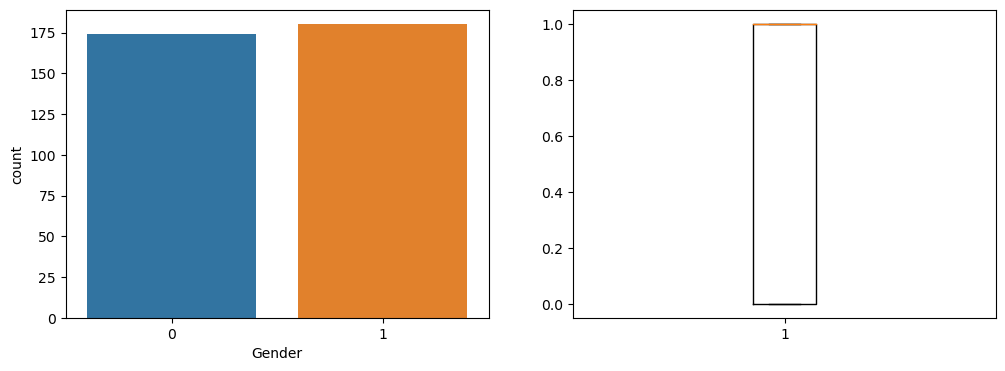

In [ ]:
#untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'gender'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['Gender'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['Gender'])
plt.show()

#terlihat bahwa jumlah antara laki-laki dengan perempuan hampir mendekati jumlah yang sama

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


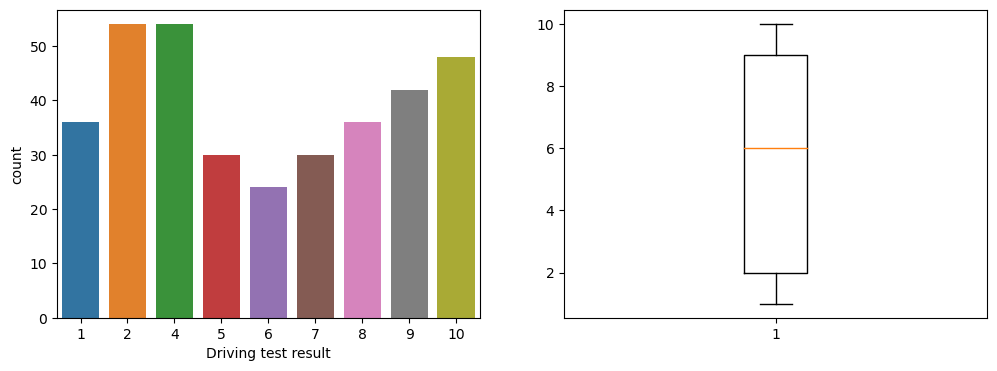

In [ ]:
##untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'driving test result'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['Driving test result'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['Driving test result'])
plt.show()

#terlihat bahwa isi data driving test result memiliki jumlah nilai yang berbeda-beda

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


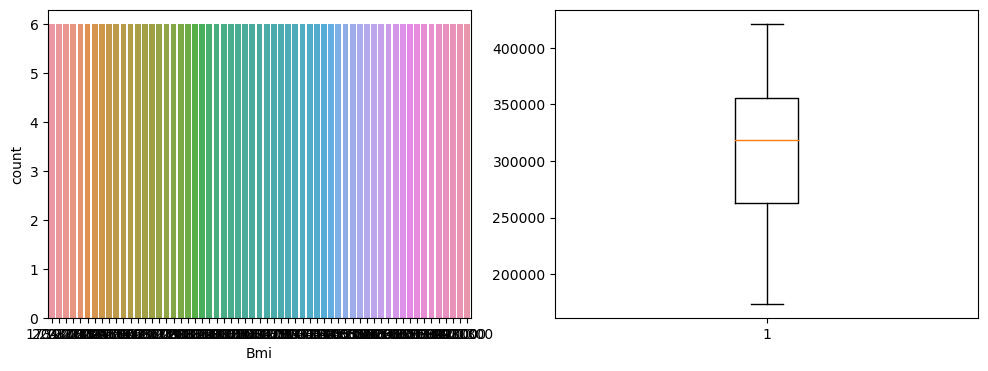

In [ ]:
##untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'bmi'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['Bmi'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['Bmi'])
plt.show()

#terlihat bahwa isi data bmi memiliki jumlah nilai yang sama yaitu masing-masing memiliki jumlah '6'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


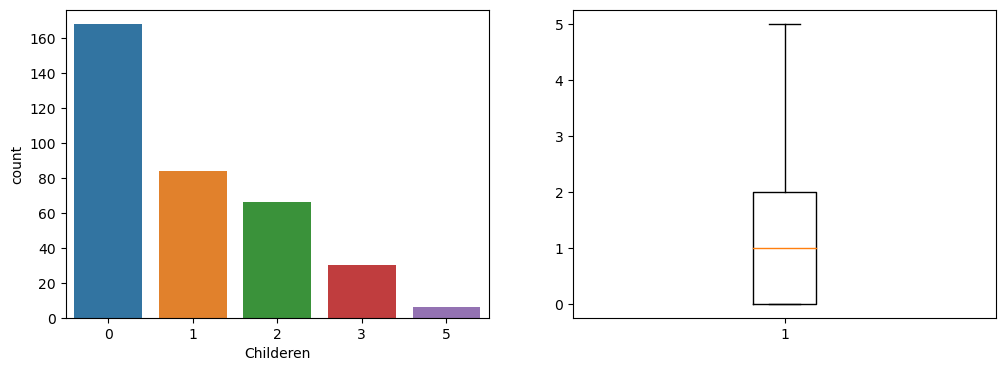

In [ ]:
#untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'childeren'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['Childeren'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['Childeren'])
plt.show()

#terlihat bahwa 160 orang tidak memiliki tanggungan (0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


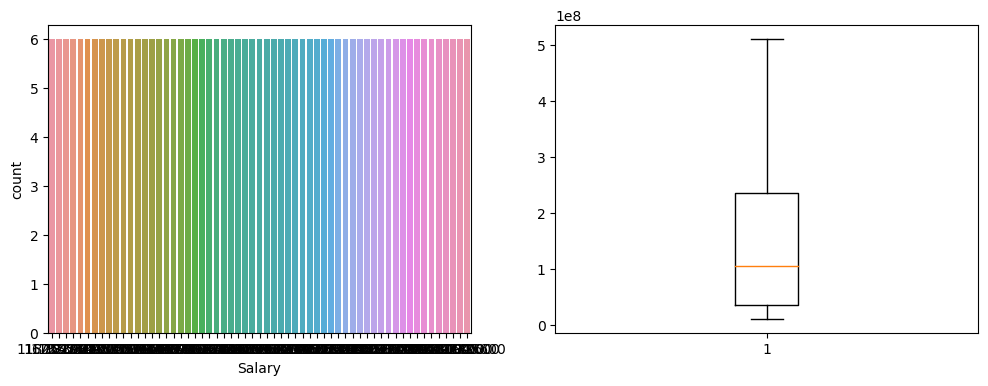

In [ ]:
#untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'salary'
f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['Salary'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['Salary'])
plt.show()

#terlihat bahwa masing-masing orang (tiap 6 orang) memiliki gaji yang sama

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


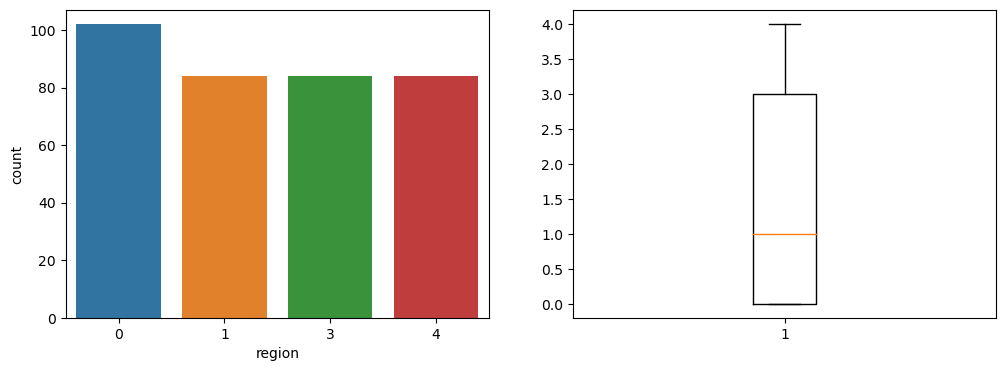

In [ ]:
##untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'region'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['region'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['region'])
plt.show()

#terlihat bahwa terdapat 3 negara yang hampir memiliki jumlah yang sama

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


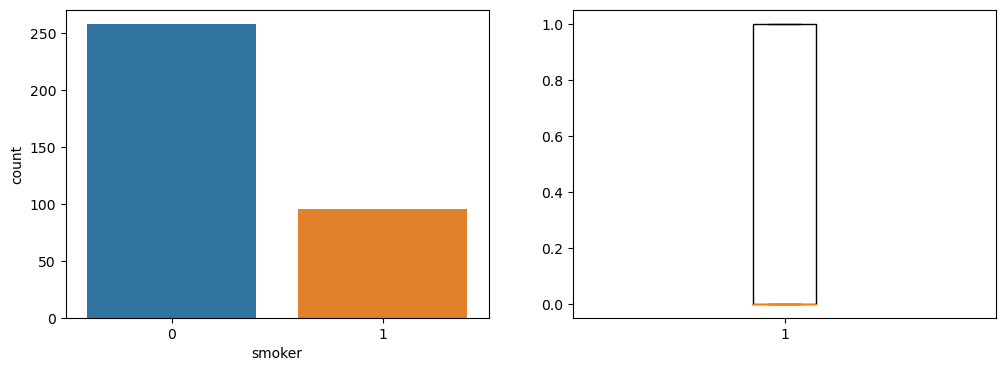

In [ ]:
#untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'smoker'
f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['smoker'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['smoker'])
plt.show()

#terlihat bahwa 250 orang ternyata tidak merokok (bukan perokok)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


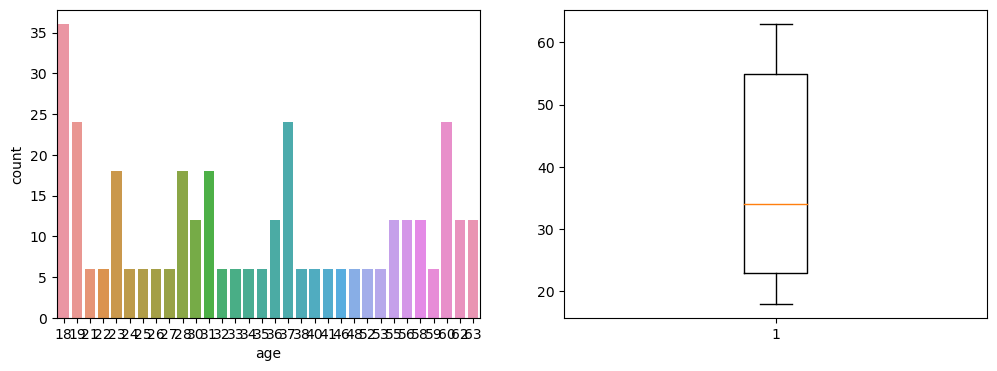

In [ ]:
##untuk membuat visualisasi yang membandingkan distribusi kategori dan distribusi nilai numerik dari kolom 'age'

f = plt.figure(figsize=(12,4))

#untuk memberikan gambaran tentang persebaran frekuensi masing-masing nilai kategori dalam kolom
f.add_subplot(1,2,1)
sns.countplot(df_mf['age'])

#untuk menampilkan distribusi nilai numerik dalam kolom
f.add_subplot(1,2,2)
plt.boxplot(df_mf['age'])
plt.show()

#terlihat bahwa umur seseorang berbeda-beda atau sangat variatif

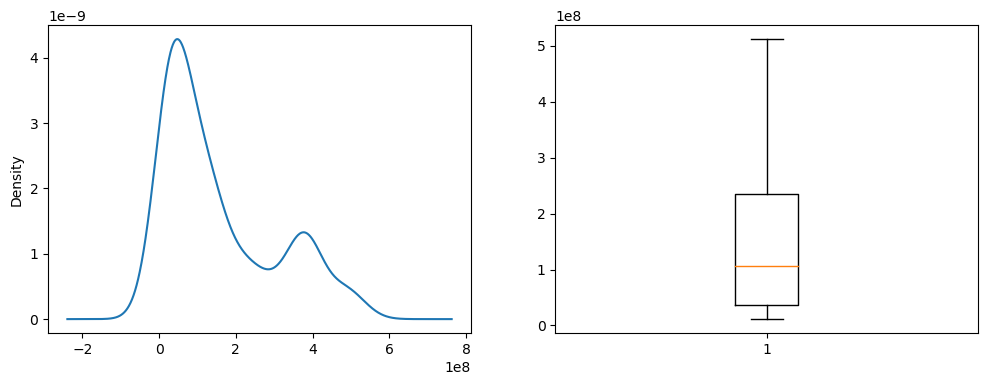

In [ ]:
#untuk membuat visualisasi yang membandingkan nilai distribusi dan sebaran nilai numerik dari kolom 'salary'

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df_mf['Salary'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df_mf['Salary'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

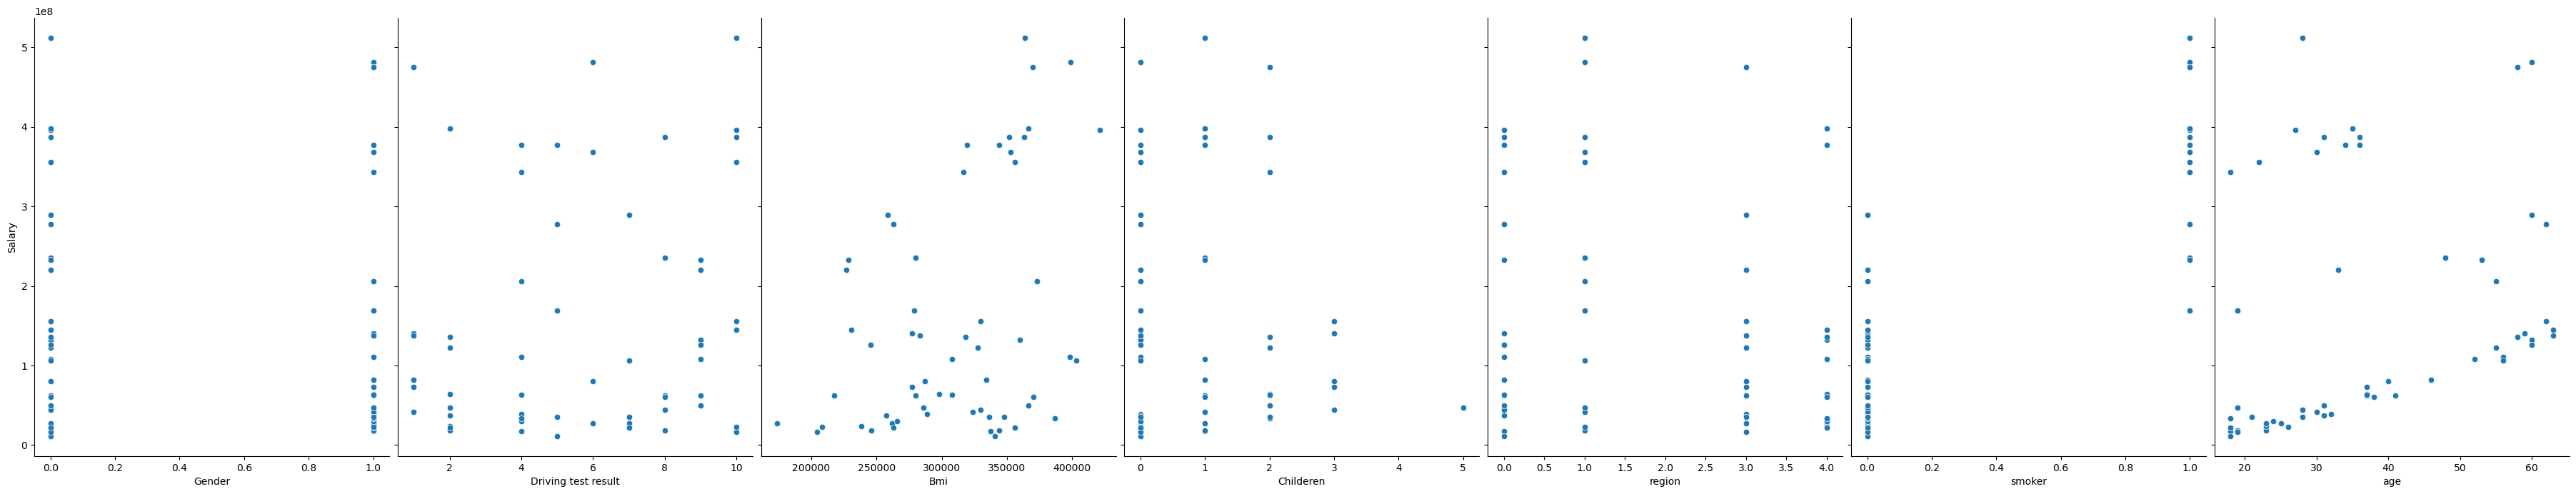

In [ ]:
#untuk membuat sebuah pair plot yang memvisualisasikan hubungan antara kolom yang dipilih dengan kolom 'salary'

plt.figure(figsize=(10,8))
sns.pairplot(data=df_mf, x_vars=['Gender', 'Driving test result', 'Bmi', 'Childeren', 'region', 'smoker', 'age'],
            y_vars=['Salary'], size=7, aspect=0.75)
plt.show()

In [ ]:
#untuk menghasilkan matriks korelasi antara kolom-kolom dengan menggunakan metode .corr

df_mf.corr().style.background_gradient().set_precision(2)

C:\Users\aulia\AppData\Local\Temp\ipykernel_3520\416506897.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_mf.corr().style.background_gradient().set_precision(2)


,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
Gender,1.00,-0.63,-0.07,0.08,-0.15,-0.02,-0.09,-0.23
Driving test result,-0.63,1.00,-0.01,-0.20,0.16,-0.09,0.15,0.00
Bmi,-0.07,-0.01,1.00,0.05,0.38,-0.14,0.29,0.06
Childeren,0.08,-0.20,0.05,1.00,-0.08,-0.01,-0.11,-0.01
Salary,-0.15,0.16,0.38,-0.08,1.00,-0.19,0.87,0.27
region,-0.02,-0.09,-0.14,-0.01,-0.19,1.00,-0.29,0.01
smoker,-0.09,0.15,0.29,-0.11,0.87,-0.29,1.00,0.01
age,-0.23,0.00,0.06,-0.01,0.27,0.01,0.01,1.00


# **Regresi Linear**

In [ ]:
df_mf.head()

,Date,Gender,Driving test result,Bmi,Childeren,Salary,region,smoker,age
0,1/11/2022,1,5,279000,0,168849200,1,1,19
1,1/11/2022,1,4,337700,1,17255500,0,0,18
2,1/11/2022,0,8,330000,3,44494600,0,0,28
3,1/11/2022,0,9,227000,0,219844700,3,0,33
4,1/11/2022,1,4,288800,0,38668600,3,0,32


In [ ]:
#variabel X untuk memilih data (kolom) yang akan digunakan

X = df_mf[['Gender', 'Driving test result', 'Bmi', 'Childeren', 'region', 'smoker', 'age']]
X.head(4)

,Gender,Driving test result,Bmi,Childeren,region,smoker,age
0,1,5,279000,0,1,1,19
1,1,4,337700,1,0,0,18
2,0,8,330000,3,0,0,28
3,0,9,227000,0,3,0,33


In [ ]:
#variabel y yaitu salary, yang akan digunakan sebagai prediksi gaji

y = df_mf['Salary']
y.head(4)

0    168849200
1     17255500
2     44494600
3    219844700
Name: Salary, dtype: int64

In [ ]:
#Membagi data training dan testing. X sebagai input features, y sebagai target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#untuk menampilkan dimensi dari data training dan testing

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(247, 7)
(247,)
(107, 7)
(107,)


In [ ]:
#Menggunakan metode regresi linear
#melatih regresi linear dengan data training

mf = LinearRegression()
mf.fit(X_train, y_train)

LinearRegression()

In [ ]:
#menampilkan koefiesien dan intercept dari regresi linear

print(mf.coef_)
print(mf.intercept_)

[7.89872503e+06 4.51479049e+06 3.69062981e+02 1.90306707e+06
 6.56327209e+06 2.71895002e+08 2.42612132e+06]
-164955328.5264096


In [ ]:
#membentuk dataframe yang berisi daftar fitur (nilai X) dan nilai koefisien

coef_dict = {
    'features': X.columns,
    'coef_value': mf.coef_.flatten()
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Gender,7.898725e+06
1,Driving test result,4.514790e+06
2,Bmi,3.690630e+02
3,Childeren,1.903067e+06
4,region,6.563272e+06
5,smoker,2.718950e+08
6,age,2.426121e+06


In [ ]:
#menggunakan model yang telah dilatih untuk prediksi terhadap data testing

y_pred = mf.predict(X_test)

In [ ]:
# menampilkan skor r-squared dari model, yang mengindikasikan seberapa baik model dapat menjelaskan variase dalam data testing

mf.score(X_test, y_test)

0.8792385274319491

In [ ]:
# Gender  : 0 sebagai laki-laki
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

mf.predict([[0, 6, 227000, 5, 1, 1, 21]])

#ternyata mempunyai salary (gaji) sebesar 284.832.868 rupiah atau $19.023,73

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.84832868e+08])

In [ ]:
# Gender  : 1 sebagai Perempuan
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

mf.predict([[1, 6, 227000, 5, 1, 1, 21]])

#ternyata mempunyai salary (gaji) sebesar 292.731.593 rupiah atau $19.587,26

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92731593e+08])

In [ ]:
#Menghitung metrik evaluasi seperti Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error antara nilai sebenarnya y_test dengan prediksi y_pred.

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 33499146.690126073
Mean Squared Error: 2337731650109509.5
Root Mean Squared Error: 48350094.62358382
R-squared (R2) Score: 0.8792385274319491


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

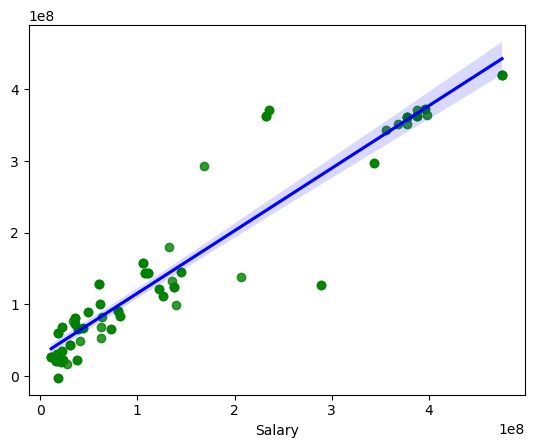

In [ ]:
#Menampilkan scatter plot dengan garis regresi yang menggambarkan hubungan antara nilai sebenarnya y_test dengan prediksi y_pred.

sns.regplot(y_test, y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

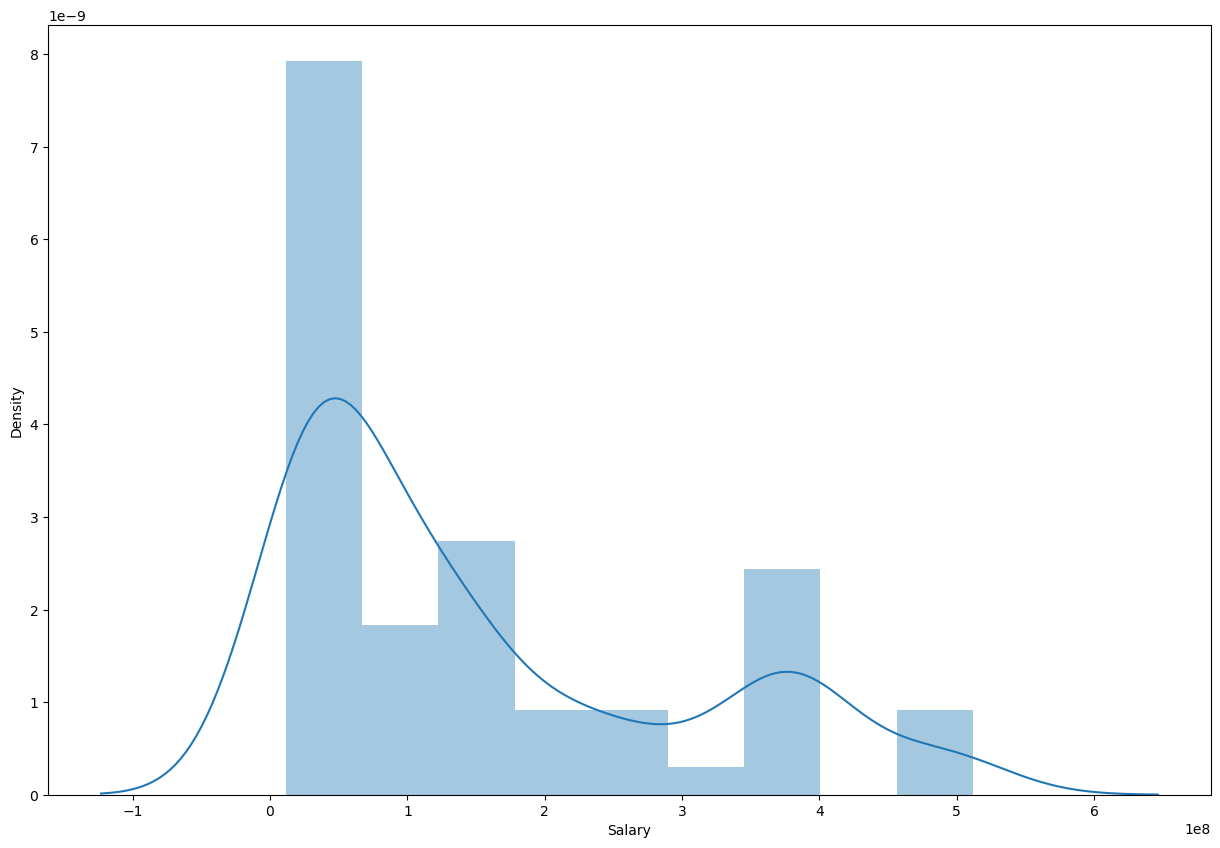

In [ ]:
#Menampilkan histogram dan kurva kepadatan dari kolom 'Salary' dalam dataframe df_mf.

import seaborn as seabornInstance
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_mf['Salary'])

# **Random Forest Regressor**

In [ ]:
#Menggunakan metode Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Membuat variabel X dan variabel y. Variabel y digunakan sebagai prediksi yaitu prediksi gaji

X = df_mf[['Gender', 'Driving test result', 'Bmi', 'Childeren', 'region', 'smoker', 'age']]
y = df_mf['Salary']

In [ ]:
#membagi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#menginisialisasi objek RandomForestRegressor dengan mengatur hiperparameter seperti n_estimators (jumlah pohon dalam ensemble) dan max_depth (kedalaman maksimum dari setiap pohon) dan menentukan random_state untuk memastikan reproduktibilitas hasil.

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

In [ ]:
#untuk melatih model menggunakan metode fit dengan memberikan data latih (X_train dan y_train).

rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
#untuk melakukan prediksi pada data uji menggunakan metode predict dengan memberikan data uji (X_test).

y_pred = rf_regressor.predict(X_test)

In [ ]:
#melakukan prediksi pada data baru dengan menggunakan predict
# Gender  : 0 sebagai laki-laki
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

future_salary = [[0, 6, 227000, 5, 1, 1, 21]]
future_pred = rf_regressor.predict(future_salary)
print('Prediksi kategori gaji yang dimiliki : ', future_pred)

#ternyata mempunyai salary (gaji) sebesar 207.570.293 rupiah atau $13.863,43

Prediksi kategori gaji yang dimiliki :  [2.07570293e+08]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#melakukan prediksi pada data baru dengan menggunakan predict
# Gender  : 1 sebagai perempuan
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

future_salary = [[1, 6, 227000, 5, 1, 1, 21]]
future_pred = rf_regressor.predict(future_salary)
print('Prediksi kategori gaji yang dimiliki : ', future_pred)

#ternyata mempunyai salary (gaji) sebesar 169.517.535 rupiah atau $11.342,76

Prediksi kategori gaji yang dimiliki :  [1.69517535e+08]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#menggunakan metode score untuk mendapatkan nilai skor akurasi pada data uji.
score = rf_regressor.score(X_test, y_test)
print('Score:', score)

Score: 0.9998726807094817


In [ ]:
#mengevaluasi performa model dengan menghitung metrik-metrik evaluasi seperti mean absolute error (mae), mean squared error (mse), r-squared score (r2)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))

MAE :  685562.2447656706
MSE :  2464679576894.7305
R2 :  0.9998726807094817


In [ ]:
# Menghitung dan menampilkan fitur penting (yang paling berpengaruh)
importances = list(rf_regressor.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:7} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: smoker  Importance: 0.76
Variable: Bmi     Importance: 0.11
Variable: age     Importance: 0.11
Variable: Childeren Importance: 0.02
Variable: Driving test result Importance: 0.01
Variable: region  Importance: 0.01
Variable: Gender  Importance: 0.0


[None, None, None, None, None, None, None]

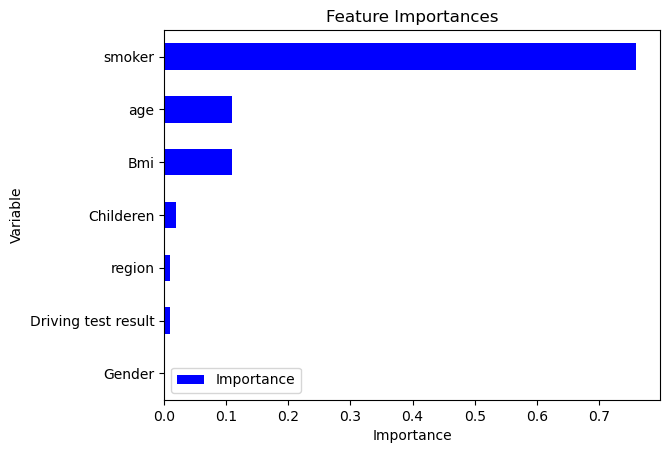

In [ ]:
#Mengubah daftar fitur penting menjadi DataFrame
df_importances = pd.DataFrame(feature_importances, columns=['Variable', 'Importance'])

#Mengurutkan DataFrame berdasarkan pentingnya fitur
df_importances = df_importances.sort_values('Importance', ascending=True)

#Membuat grafik batang horizontal
ax = df_importances.plot(kind='barh', x='Variable', y='Importance', color='blue')

# Memberikan judul dan label sumbu
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Variable')

# Menampilkan grafik
plt.show()

# **Decision Tree Regressor**

In [ ]:
#Menggunakan metode Decision tree

from sklearn.tree import DecisionTreeRegressor
import pydotplus
from IPython.display import Image
from sklearn import tree

In [ ]:
#Membuat variabel X dan variabel y. Variabel y digunakan sebagai prediksi yaitu prediksi gaji

X = df_mf[['Gender', 'Driving test result', 'Bmi', 'Childeren', 'region', 'smoker', 'age']]
y = df_mf['Salary']

In [ ]:
#membagi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#menginisialisasi objek DecisionTreeRegressor dengan mengatur hiperparameter seperti max_depth (kedalaman maksimum dari pohon keputusan) dan random_state untuk memastikan reproduktibilitas hasil.

dt_model = DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
#melatih model menggunakan metode fit dengan memberikan data latih (X_train dan y_train).

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
#melakukan prediksi pada data baru (salary) menggunakan metode predict.
# Gender  : 0 sebagai laki-laki
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

future_salary = [[0, 6, 227000, 5, 1, 1, 21]]
future_pred = dt_model.predict(future_salary)

print('Prediksi kategori gaji yang dimiliki :', future_pred)

#ternyata mempunyai salary (gaji) sebesar 254.507.562 rupiah atau $16.998,33

Prediksi kategori gaji yang dimiliki : [2.54507562e+08]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#melakukan prediksi pada data baru (salary) menggunakan metode predict.
# Gender  : 1 sebagai Perempuan
# Driving test result : memiliki nilai 6
# Bmi : memiliki 227000
# Childeren : mempunyai tanggungan 5 orang
# region : terletak di soutwest
# smoker : perokok
# age : berumur 21
# kira-kira mempunyai salary berapa ya?

future_salary = [[1, 6, 227000, 5, 1, 1, 21]]
future_pred = dt_model.predict(future_salary)

print('Prediksi kategori gaji yang dimiliki :', future_pred)

#ternyata mempunyai salary (gaji) sebesar 168.849.200 rupiah atau $11.298,04

Prediksi kategori gaji yang dimiliki : [1.688492e+08]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#melakukan prediksi pada data uji (X_test) menggunakan metode predict dan menyimpan hasil prediksi dalam variabel y_pred.

y_pred = dt_model.predict(X_test)

In [ ]:
#menghitung skor akurasi model pada data uji menggunakan metode score dan mencetaknya.

score = dt_model.score(X_test, y_test)
print("Score:", score)

Score: 0.9517685101946561


In [ ]:
# menghitung metrik evaluasi seperti mean absolute error (mae), mean squared error (mse), dan r-squared score (r2)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

MAE: 21930906.14306982
MSE: 933677586503004.8
R2 Score: 0.9517685101946561


In [ ]:
# Menghitung dan menampilkan fitur penting
importances = list(dt_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

[print('Variable: {:7} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: smoker  Importance: 0.79
Variable: Bmi     Importance: 0.1
Variable: age     Importance: 0.08
Variable: Childeren Importance: 0.03
Variable: Gender  Importance: 0.01
Variable: Driving test result Importance: 0.0
Variable: region  Importance: 0.0


[None, None, None, None, None, None, None]

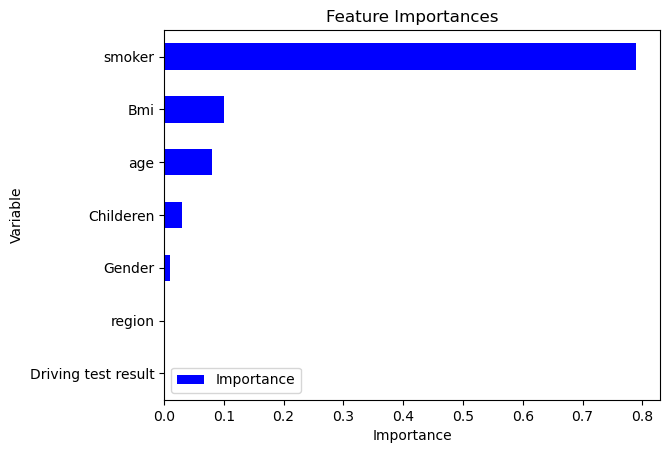

In [ ]:
# Mengubah daftar fitur penting menjadi DataFrame
df_importances = pd.DataFrame(feature_importances, columns=['Variable', 'Importance'])

# Mengurutkan DataFrame berdasarkan pentingnya fitur
df_importances = df_importances.sort_values('Importance', ascending=True)

# Membuat grafik batang horizontal
ax = df_importances.plot(kind='barh', x='Variable', y='Importance', color='blue')

# Memberikan judul dan label sumbu
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Variable')

# Menampilkan grafik
plt.show()

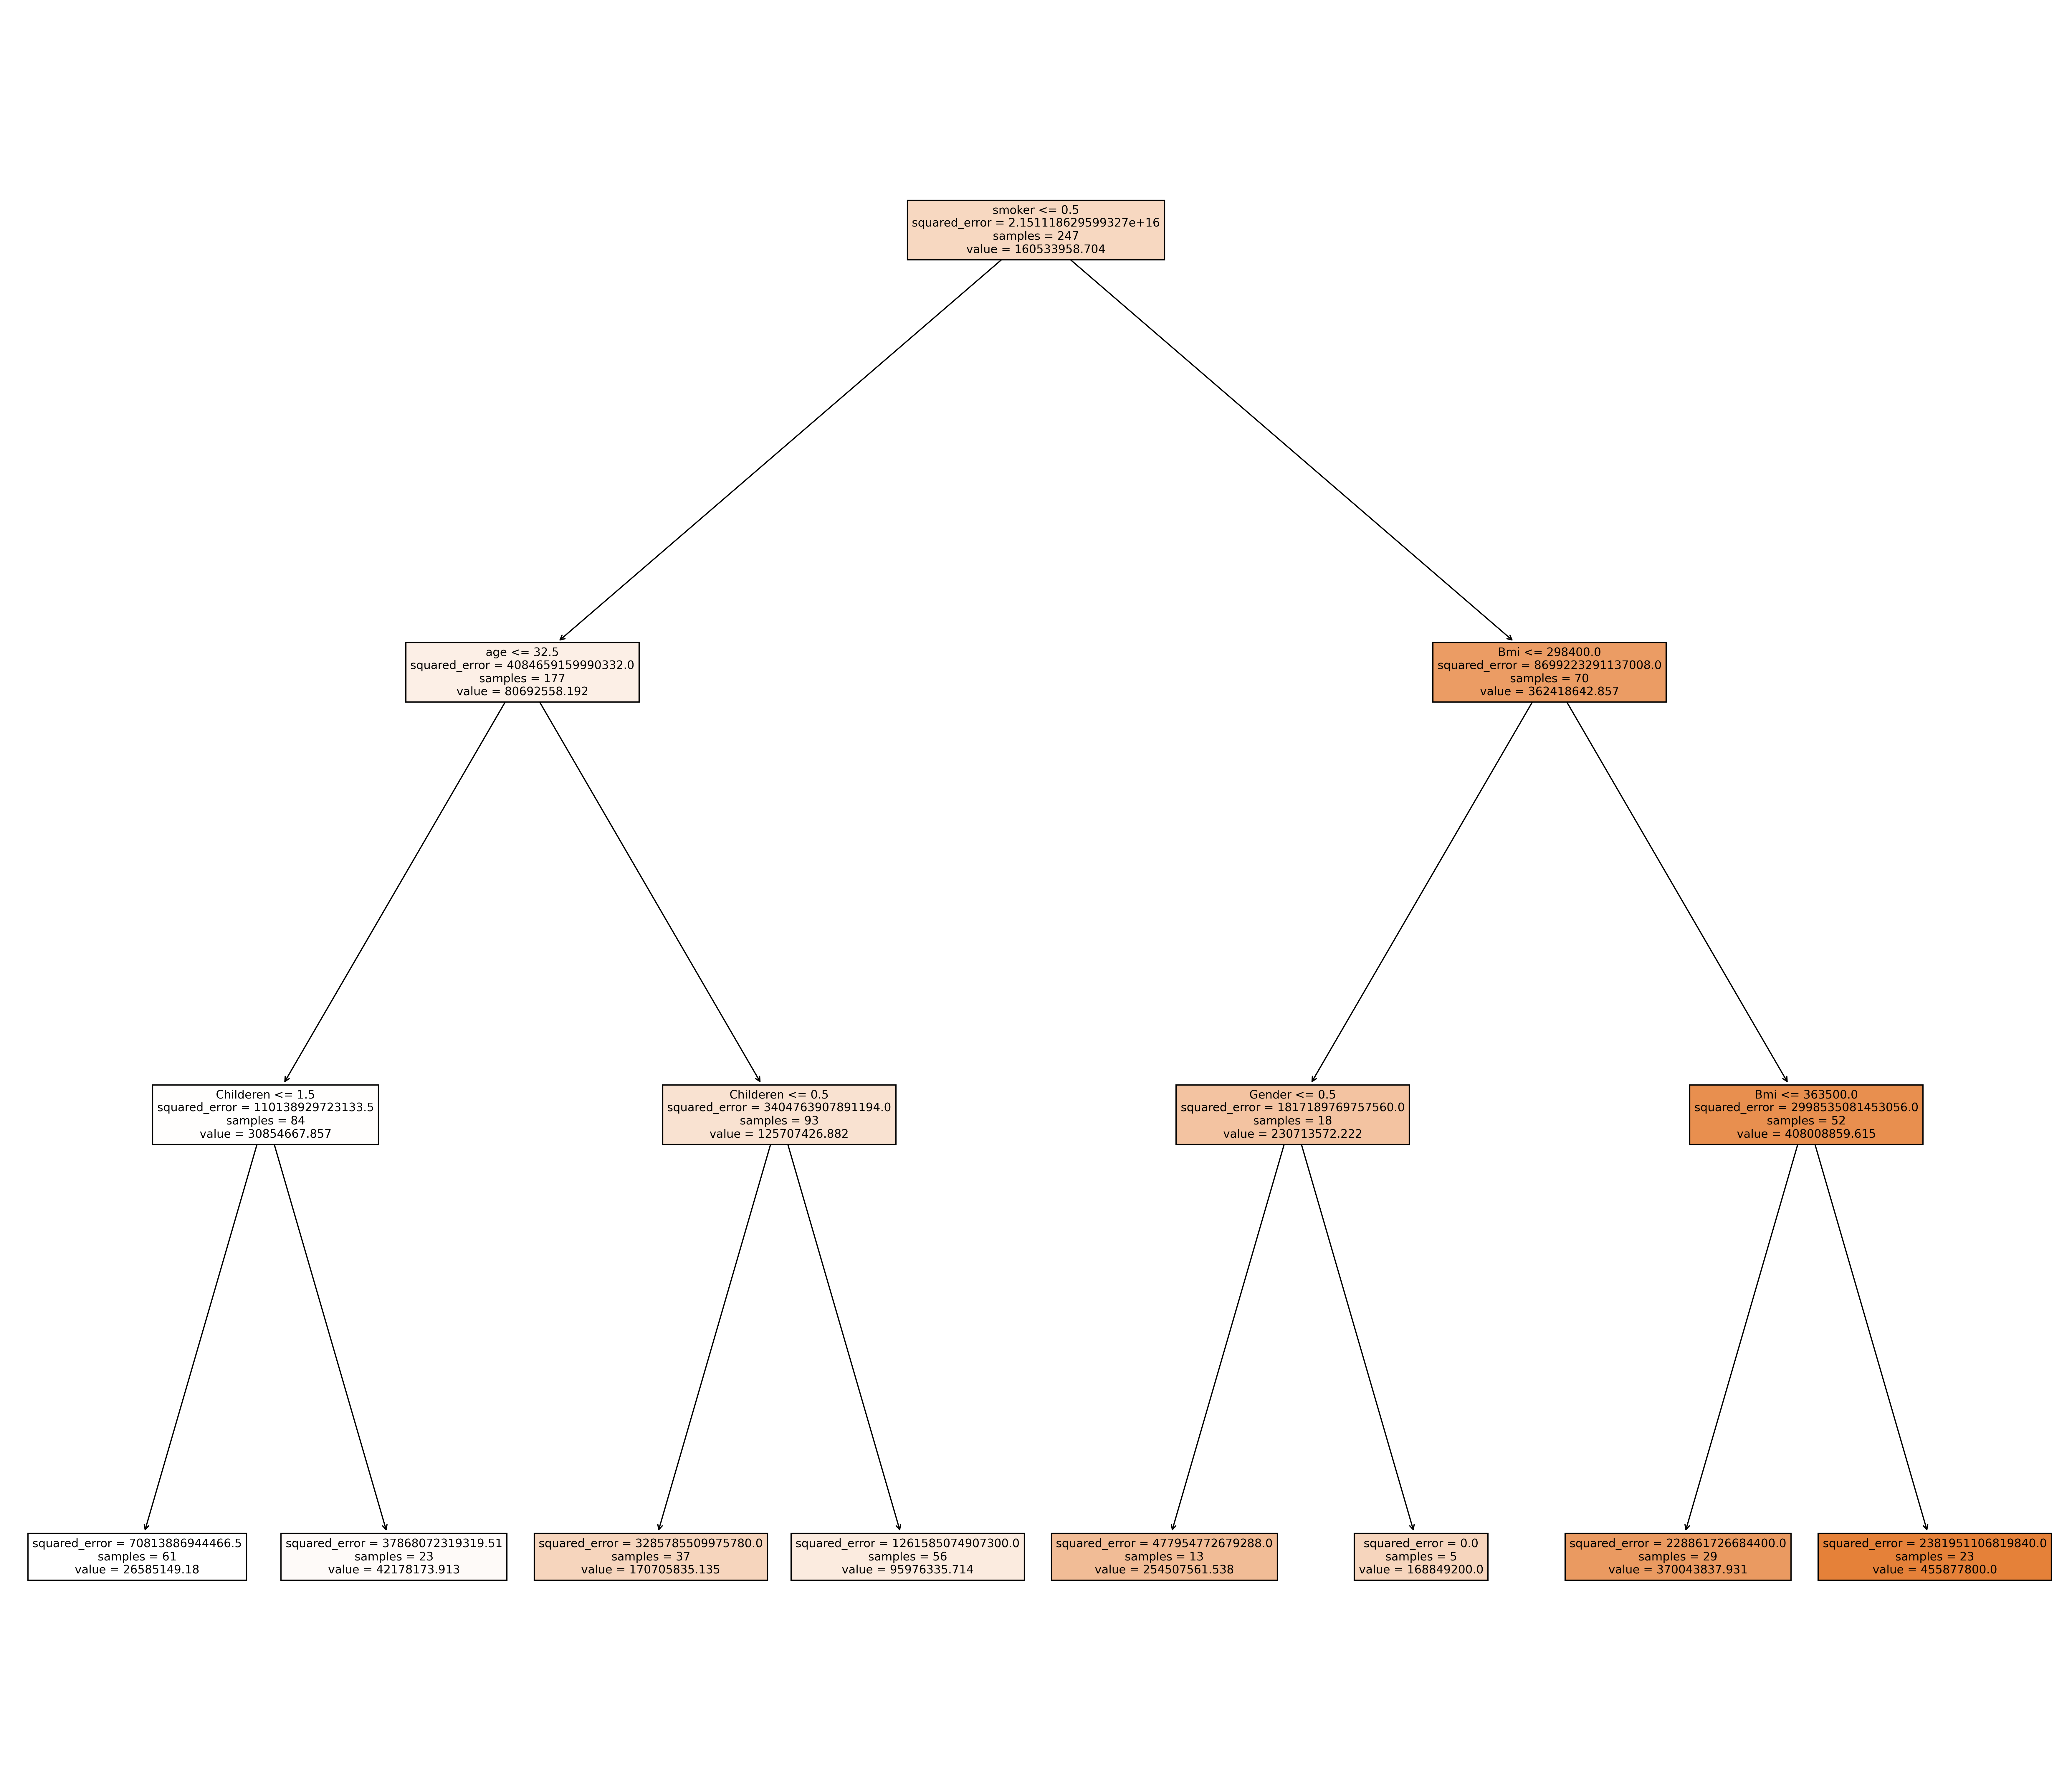

In [ ]:
#menggunakan modul PIL untuk membuka dan menampilkan gambar pohon keputusan yang telah disimpan sebelumnya menggunakan plt.savefig.

from PIL import Image

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 26), dpi=300)
tree.plot_tree(dt_model, feature_names=list(X.columns.values), filled=True, ax=axes)
plt.savefig("decision_tree.png")

# Open and display the saved image
image = Image.open("decision_tree.png")
image.show()